In [275]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler


## import the library below:

In [276]:
from PyEyeSim import EyeData


In [277]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [278]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_fixations.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))


(48675, 19)


In [279]:
FixData

,id,task,sid,eye,stimfile,trialid,start_ms,end_ms,duration_ms,fix_x,fix_y,orig_fix_x,orig_fix_y,disp_x,disp_y,aoi_subline,aoi_line,class_id,label
0,0,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328491.191,328683.159,195.970,161.4900,160.5,161.4900,170.9400,0.594205,0.705880,NaN,NaN,0,non-dyslexic
1,1,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328747.177,328995.193,252.016,338.1850,160.5,338.1850,171.8650,0.422989,0.336236,line_001-part_001,line_001,0,non-dyslexic
2,2,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329063.199,329423.075,363.875,450.4050,160.5,450.4050,168.0550,1.145977,0.658192,line_001-part_002,line_001,0,non-dyslexic
3,3,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329483.064,329743.065,264.002,582.0225,160.5,582.0225,161.0100,0.424336,0.370587,line_001-part_003,line_001,0,non-dyslexic
4,4,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329775.070,330143.065,371.993,467.5750,160.5,467.5750,168.8450,0.640545,0.806104,line_001-part_002,line_001,0,non-dyslexic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48670,334,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1961417.270,1962009.528,596.258,1088.0100,750.5,1088.0100,746.2650,0.730936,0.781587,line_007-part_012,line_007,1,dyslexic
48671,335,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962017.528,1962309.460,295.932,1131.6575,750.5,1131.6575,748.9950,0.823347,1.023660,line_007-part_013,line_007,1,dyslexic
48672,336,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962401.460,1962829.128,431.659,1091.3025,750.5,1091.3025,740.7075,0.480914,0.701434,line_007-part_012,line_007,1,dyslexic
48673,337,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962853.077,1964713.191,1864.113,1150.5975,750.5,1150.5975,748.6900,1.752710,1.072156,line_007-part_013,line_007,1,dyslexic


## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (48675, 19)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 70 subjects, and 3 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t4.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t5.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  70 observers and  3  stimuli.
Mean fixation number:  231.79  +/-  6

(array(['s7_stimuli_t1.jpg', 's7_stimuli_t4.jpg', 's7_stimuli_t5.jpg'],
       dtype=object),
 array([1003, 1009, 1016, 1019, 1021, 1033, 1038, 1040, 1058, 1065, 1073,
        1075, 1082, 1090, 1095, 1109, 1113, 1115, 1134, 1145, 1160, 1166,
        1169, 1174, 1186, 1187, 1189, 1209, 1235, 1254, 1255, 1257, 1258,
        1263, 1271, 1274, 1284, 1300, 1312, 1314, 1318, 1322, 1345, 1349,
        1350, 1377, 1380, 1398, 1405, 1417, 1421, 1459, 1476, 1571, 1582,
        1591, 1626, 1693, 1729, 1744, 1760, 1858, 1859, 1869, 1879, 1903,
        1913, 1929, 1993, 1996], dtype=int64))

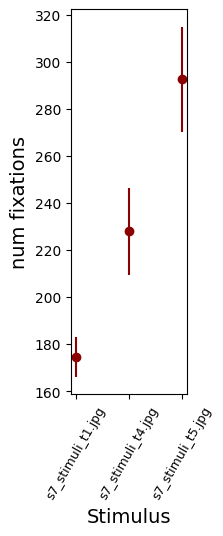

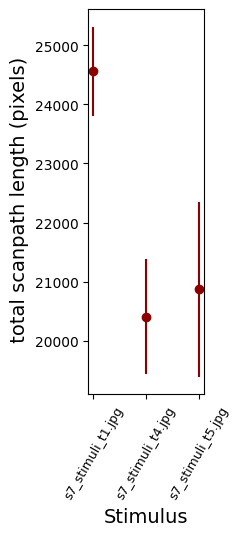

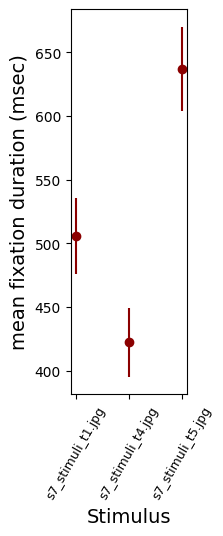

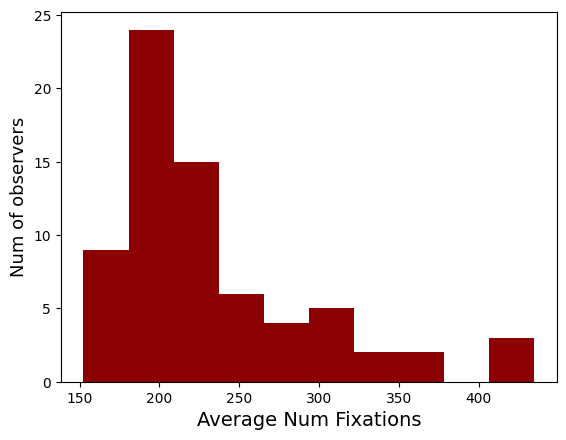

In [280]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='orig_fix_x',mean_y='orig_fix_y',FixDuration='duration_ms',Stimulus='stimfile',subjectID='sid', StimPath=Path+'images/',StimExt='.jpg')
DyslexiaDat.RunDescriptiveFix(Visual=1, duration=1)


In [281]:
_,WhichCN=DyslexiaDat.GetGroups('class_id')
WhichCN

Conditions [0 1]


array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=object)

---

## Feature extraction

In [282]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [283]:
def GlobalFeature(self, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in self.GetSaccades()[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': progressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features  

In [284]:
GlobalFeature_arrays = [GlobalFeature(DyslexiaDat, 0), 
                       GlobalFeature(DyslexiaDat, 1),
                       GlobalFeature(DyslexiaDat, 2)]

---

## TEST FOR STIMULUS 0

#### Test - ROI features

In [285]:
def vectorize(SimAndFeatureVals, subjects):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 360))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [286]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(360, 180)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(180, 90)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(90, 45)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(45, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x) 
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [287]:
def run_test(stim, momentum=0.8):
    torch.manual_seed(42)
    np.random.seed(42)
        
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    tot_subj = DyslexiaDat.ns
    labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

    # Stratified 5-Fold cross-validation to maintain label distribution
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
        best_loss = np.inf
        train_subj = train_index
        test_subj = test_index

        # Train set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=9, inferS=False,Thr=1, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, train_subj)
        labels_train = np.array([WhichCN[sub] for sub in train_subj])

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

        # Test set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=9, inferS=False,  Thr=1) 
        vector_roi = vectorize(SimAndFeatureVals, test_subj)
        labels_test = np.array([WhichCN[sub] for sub in test_subj])

        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu())) 
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

In [288]:
run_test(0)

Using device: cuda
Epoch 0 loss: 0.725679337978363
Epoch 5 loss: 0.41409796476364136
Epoch 10 loss: 0.32242676615715027
Epoch 15 loss: 0.3161484897136688
Epoch 0 loss: 0.7717153429985046
Epoch 5 loss: 0.4670673906803131
Epoch 10 loss: 0.3446654677391052
Epoch 15 loss: 0.3140695095062256
Epoch 0 loss: 0.7823764681816101
Epoch 5 loss: 0.47310906648635864
Epoch 10 loss: 0.33234789967536926
Epoch 15 loss: 0.31371569633483887
Epoch 0 loss: 0.6964258551597595
Epoch 5 loss: 0.44992685317993164
Epoch 10 loss: 0.3301923871040344
Epoch 15 loss: 0.315870076417923
Epoch 0 loss: 0.7105980515480042
Epoch 5 loss: 0.4678977131843567
Epoch 10 loss: 0.345032662153244
Epoch 15 loss: 0.3194434344768524
Average accuracy: 0.8428571428571429
Standard deviation: 0.11428571428571427
Total confusion matrix:
[[29.  6.]
 [ 5. 30.]]
False positives: 6.0
False negatives: 5.0


In [289]:
run_test(0, momentum=0.5)

Using device: cuda
Epoch 0 loss: 0.725679337978363
Epoch 5 loss: 0.451090544462204
Epoch 10 loss: 0.3488277494907379
Epoch 15 loss: 0.3316023051738739
Epoch 0 loss: 0.7717153429985046
Epoch 5 loss: 0.5200030207633972
Epoch 10 loss: 0.3884606957435608
Epoch 15 loss: 0.3287031948566437
Epoch 0 loss: 0.7823764681816101
Epoch 5 loss: 0.5059341788291931
Epoch 10 loss: 0.35667189955711365
Epoch 15 loss: 0.3254952132701874
Epoch 0 loss: 0.6964258551597595
Epoch 5 loss: 0.4986441135406494
Epoch 10 loss: 0.3690546154975891
Epoch 15 loss: 0.34246864914894104
Epoch 0 loss: 0.7105980515480042
Epoch 5 loss: 0.512027382850647
Epoch 10 loss: 0.40242907404899597
Epoch 15 loss: 0.33421140909194946
Average accuracy: 0.9
Standard deviation: 0.0349927106111883
Total confusion matrix:
[[31.  4.]
 [ 3. 32.]]
False positives: 4.0
False negatives: 3.0


#### First Test - Original Features

In [290]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 366))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_saccade_amplitude']
        vector_roi[subj][362] = Features['mean_fixation_duration']
        vector_roi[subj][363] = Features['total_reading_duration']
        vector_roi[subj][364] = Features['regression']
        vector_roi[subj][365] = Features['progression/regression']
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [291]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(366, 184)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(184, 92)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(92, 41)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(41, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [292]:
def run_test(stim, glob_feature, momentum=0.8):
    torch.manual_seed(42)
    np.random.seed(42)
        
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    tot_subj = DyslexiaDat.ns
    labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

    # Stratified 5-Fold cross-validation to maintain label distribution
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
        best_loss = np.inf
        train_subj = train_index
        test_subj = test_index

        # Train set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=9, inferS=False, Thr=1, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, train_subj, glob_feature)
        labels_train = np.array([WhichCN[sub] for sub in train_subj])

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

        # Test set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=9, inferS=False, Thr=1) 
        vector_roi = vectorize(SimAndFeatureVals, test_subj, glob_feature)
        labels_test = np.array([WhichCN[sub] for sub in test_subj])

        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu())) 
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

In [293]:
run_test(0, GlobalFeature_arrays[0])

Using device: cuda
Epoch 0 loss: 0.7440845370292664
Epoch 5 loss: 0.43323639035224915
Epoch 10 loss: 0.3286285102367401
Epoch 15 loss: 0.31584495306015015
Epoch 0 loss: 0.6790138483047485
Epoch 5 loss: 0.446428120136261
Epoch 10 loss: 0.33163365721702576
Epoch 15 loss: 0.31470435857772827
Epoch 0 loss: 0.7055031657218933
Epoch 5 loss: 0.41111913323402405
Epoch 10 loss: 0.3202992081642151
Epoch 15 loss: 0.3148067891597748
Epoch 0 loss: 0.6756194233894348
Epoch 5 loss: 0.4158211052417755
Epoch 10 loss: 0.33927983045578003
Epoch 15 loss: 0.3318299651145935
Epoch 0 loss: 0.7574041485786438
Epoch 5 loss: 0.5152752995491028
Epoch 10 loss: 0.34806641936302185
Epoch 15 loss: 0.3168446719646454
Average accuracy: 0.8285714285714286
Standard deviation: 0.1324802642213672
Total confusion matrix:
[[27.  8.]
 [ 4. 31.]]
False positives: 8.0
False negatives: 4.0


In [294]:
run_test(0, GlobalFeature_arrays[0], momentum=0.5)

Using device: cuda
Epoch 0 loss: 0.7440845370292664
Epoch 5 loss: 0.481346070766449
Epoch 10 loss: 0.36276334524154663
Epoch 15 loss: 0.3415836691856384
Epoch 0 loss: 0.6790138483047485
Epoch 5 loss: 0.4925258755683899
Epoch 10 loss: 0.3796624541282654
Epoch 15 loss: 0.33513644337654114
Epoch 0 loss: 0.7055031657218933
Epoch 5 loss: 0.45519575476646423
Epoch 10 loss: 0.3451520502567291
Epoch 15 loss: 0.32694777846336365
Epoch 0 loss: 0.6756194233894348
Epoch 5 loss: 0.45606762170791626
Epoch 10 loss: 0.37291449308395386
Epoch 15 loss: 0.3305007815361023
Epoch 0 loss: 0.7574041485786438
Epoch 5 loss: 0.5491457581520081
Epoch 10 loss: 0.38523492217063904
Epoch 15 loss: 0.3467532992362976
Average accuracy: 0.8142857142857143
Standard deviation: 0.14708043058552855
Total confusion matrix:
[[28.  7.]
 [ 6. 29.]]
False positives: 7.0
False negatives: 6.0


#### Second Test - Original and Additional Features

In [295]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 369))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_saccade_amplitude']
        vector_roi[subj][362] = Features['std_saccade_amplitude']
        vector_roi[subj][363] = Features['mean_fixation_duration']
        vector_roi[subj][364] = Features['std_fixation_duration']
        vector_roi[subj][365] = Features['total_reading_duration']
        vector_roi[subj][366] = Features['regression']
        vector_roi[subj][367] = Features['progression/regression']
        vector_roi[subj][368] = Features['fixation_entropy']
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [296]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(369, 185)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(185, 93)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(93, 42)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [297]:
run_test(0, GlobalFeature_arrays[0])

Using device: cuda
Epoch 0 loss: 0.716890275478363
Epoch 5 loss: 0.4560030996799469
Epoch 10 loss: 0.33503463864326477
Epoch 15 loss: 0.3207111656665802
Epoch 0 loss: 0.7363993525505066
Epoch 5 loss: 0.439168781042099
Epoch 10 loss: 0.32699987292289734
Epoch 15 loss: 0.31399425864219666
Epoch 0 loss: 0.7211319804191589
Epoch 5 loss: 0.43141260743141174
Epoch 10 loss: 0.3242725431919098
Epoch 15 loss: 0.3152833580970764
Epoch 0 loss: 0.6843170523643494
Epoch 5 loss: 0.4425542652606964
Epoch 10 loss: 0.31955859065055847
Epoch 15 loss: 0.3177971839904785
Epoch 0 loss: 0.6879177689552307
Epoch 5 loss: 0.47275182604789734
Epoch 10 loss: 0.34189656376838684
Epoch 15 loss: 0.31725552678108215
Average accuracy: 0.8857142857142858
Standard deviation: 0.05714285714285717
Total confusion matrix:
[[31.  4.]
 [ 4. 31.]]
False positives: 4.0
False negatives: 4.0


In [298]:
run_test(0, GlobalFeature_arrays[0], momentum=0.5)

Using device: cuda
Epoch 0 loss: 0.716890275478363
Epoch 5 loss: 0.4909265339374542
Epoch 10 loss: 0.3712545335292816
Epoch 15 loss: 0.34341973066329956
Epoch 0 loss: 0.7363993525505066
Epoch 5 loss: 0.484699547290802
Epoch 10 loss: 0.37076428532600403
Epoch 15 loss: 0.32700467109680176
Epoch 0 loss: 0.7211319804191589
Epoch 5 loss: 0.47245171666145325
Epoch 10 loss: 0.3616420328617096
Epoch 15 loss: 0.3381834626197815
Epoch 0 loss: 0.6843170523643494
Epoch 5 loss: 0.49033528566360474
Epoch 10 loss: 0.3597601354122162
Epoch 15 loss: 0.3421250879764557
Epoch 0 loss: 0.6879177689552307
Epoch 5 loss: 0.5216354131698608
Epoch 10 loss: 0.3950973451137543
Epoch 15 loss: 0.35152190923690796
Average accuracy: 0.8714285714285713
Standard deviation: 0.06998542122237654
Total confusion matrix:
[[32.  3.]
 [ 6. 29.]]
False positives: 3.0
False negatives: 6.0


#### Third Test - Original Features + Similarity Measure (Average)

In [299]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 368))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_saccade_amplitude']
        vector_roi[subj][362] = Features['mean_fixation_duration']
        vector_roi[subj][363] = Features['total_reading_duration']
        vector_roi[subj][364] = Features['regression']
        vector_roi[subj][365] = Features['progression/regression']
        vector_roi[subj][366] = SimsVals[subj][0][0][0]
        vector_roi[subj][367] = SimsVals[subj][0][0][1]
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [300]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(368, 184)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(184, 92)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(92, 41)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(41, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [301]:
def run_test(stim, method, glob_feature, thr=0, match=False, momentum=0.8):
    torch.manual_seed(42)
    np.random.seed(42)
        
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    tot_subj = DyslexiaDat.ns
    labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

    # Stratified 5-Fold cross-validation to maintain label distribution
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
        best_loss = np.inf
        train_subj = train_index
        test_subj = test_index

        # Train set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=9, inferS=False, method=method,Thr=thr, match=match, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, train_subj, glob_feature)
        labels_train = np.array([WhichCN[sub] for sub in train_subj])

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

        # Test set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=9, inferS=False, method=method, Thr=thr, match=match) 
        vector_roi = vectorize(SimAndFeatureVals, test_subj, glob_feature)
        labels_test = np.array([WhichCN[sub] for sub in test_subj])

        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu())) 
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

In [302]:
print("Testing with cosine similarity (Thresold 10):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=False)
print("Testing with peak180 (match True):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7176579833030701
Epoch 5 loss: 0.4671799838542938
Epoch 10 loss: 0.34874406456947327
Epoch 15 loss: 0.31501439213752747
Epoch 0 loss: 0.7025725245475769
Epoch 5 loss: 0.417579710483551
Epoch 10 loss: 0.3405914902687073
Epoch 15 loss: 0.3185428977012634
Epoch 0 loss: 0.7624030709266663
Epoch 5 loss: 0.3722159266471863
Epoch 10 loss: 0.3157619535923004
Epoch 15 loss: 0.31878599524497986
Epoch 0 loss: 0.7643400430679321
Epoch 5 loss: 0.4206576347351074
Epoch 10 loss: 0.34276100993156433
Epoch 15 loss: 0.3368838131427765
Epoch 0 loss: 0.7234059572219849
Epoch 5 loss: 0.4588501453399658
Epoch 10 loss: 0.35859769582748413
Epoch 15 loss: 0.31663474440574646
Average accuracy: 0.8571428571428573
Standard deviation: 0.14982983545287878
Total confusion matrix:
[[28.  7.]
 [ 3. 32.]]
False positives: 7.0
False negatives: 3.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.71880513429641

In [303]:
print("Testing with cosine similarity (Thresold 10):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=False, momentum=0.5)
print("Testing with peak180 (match True):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7176579833030701
Epoch 5 loss: 0.5189444422721863
Epoch 10 loss: 0.4038871228694916
Epoch 15 loss: 0.3310384750366211
Epoch 0 loss: 0.7025725245475769
Epoch 5 loss: 0.4524180293083191
Epoch 10 loss: 0.391631543636322
Epoch 15 loss: 0.3439585268497467
Epoch 0 loss: 0.7624030709266663
Epoch 5 loss: 0.40225130319595337
Epoch 10 loss: 0.3388216197490692
Epoch 15 loss: 0.3343038558959961
Epoch 0 loss: 0.7643400430679321
Epoch 5 loss: 0.4609014391899109
Epoch 10 loss: 0.3724411129951477
Epoch 15 loss: 0.34422460198402405
Epoch 0 loss: 0.7234059572219849
Epoch 5 loss: 0.5005661845207214
Epoch 10 loss: 0.42661184072494507
Epoch 15 loss: 0.34866803884506226
Average accuracy: 0.8571428571428573
Standard deviation: 0.11952286093343938
Total confusion matrix:
[[29.  6.]
 [ 4. 31.]]
False positives: 6.0
False negatives: 4.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.7188051342964172

#### Fourth Test - Original Features + Similarity Measure (Average and Standard Deviation)

In [304]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 370))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_saccade_amplitude']
        vector_roi[subj][362] = Features['mean_fixation_duration']
        vector_roi[subj][363] = Features['total_reading_duration']
        vector_roi[subj][364] = Features['regression']
        vector_roi[subj][365] = Features['progression/regression']
        vector_roi[subj][366] = SimsVals[subj][0][0][0]
        vector_roi[subj][367] = SimsVals[subj][0][0][1]
        vector_roi[subj][368] = SimsVals[subj][0][0][2]
        vector_roi[subj][369] = SimsVals[subj][0][0][3]
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [305]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(370, 185)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(185, 93)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(93, 42)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [306]:
print("Testing with cosine similarity (Thresold 10):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=False)
print("Testing with peak180 (match True):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7112531661987305
Epoch 5 loss: 0.45318588614463806
Epoch 10 loss: 0.3342105448246002
Epoch 15 loss: 0.31475111842155457
Epoch 0 loss: 0.7048307061195374
Epoch 5 loss: 0.47267165780067444
Epoch 10 loss: 0.32874396443367004
Epoch 15 loss: 0.3187360465526581
Epoch 0 loss: 0.7122820615768433
Epoch 5 loss: 0.37804141640663147
Epoch 10 loss: 0.32286420464515686
Epoch 15 loss: 0.31379103660583496
Epoch 0 loss: 0.703490138053894
Epoch 5 loss: 0.4042757451534271
Epoch 10 loss: 0.3395106792449951
Epoch 15 loss: 0.3357784152030945
Epoch 0 loss: 0.7252617478370667
Epoch 5 loss: 0.469062477350235
Epoch 10 loss: 0.3455038070678711
Epoch 15 loss: 0.3159814178943634
Average accuracy: 0.8857142857142856
Standard deviation: 0.07284313590846837
Total confusion matrix:
[[30.  5.]
 [ 3. 32.]]
False positives: 5.0
False negatives: 3.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.70826262235641

In [307]:
print("Testing with cosine similarity (Thresold 10):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=False, momentum=0.5)
print("Testing with peak180 (match True):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7112531661987305
Epoch 5 loss: 0.5029663443565369
Epoch 10 loss: 0.3580043613910675
Epoch 15 loss: 0.3391065299510956
Epoch 0 loss: 0.7048307061195374
Epoch 5 loss: 0.5146748423576355
Epoch 10 loss: 0.38503727316856384
Epoch 15 loss: 0.3452358841896057
Epoch 0 loss: 0.7122820615768433
Epoch 5 loss: 0.40321803092956543
Epoch 10 loss: 0.34618598222732544
Epoch 15 loss: 0.3211992681026459
Epoch 0 loss: 0.703490138053894
Epoch 5 loss: 0.44549623131752014
Epoch 10 loss: 0.37254366278648376
Epoch 15 loss: 0.34546589851379395
Epoch 0 loss: 0.7252617478370667
Epoch 5 loss: 0.5051613450050354
Epoch 10 loss: 0.3905354142189026
Epoch 15 loss: 0.3442874550819397
Average accuracy: 0.8571428571428571
Standard deviation: 0.06388765649999402
Total confusion matrix:
[[31.  4.]
 [ 6. 29.]]
False positives: 4.0
False negatives: 6.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.70826262235641

#### Fifth Test - Original Features + Similarity Measure (Without Mean Saccade Amplitude)

In [308]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 367))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_fixation_duration']
        vector_roi[subj][362] = Features['total_reading_duration']
        vector_roi[subj][363] = Features['regression']
        vector_roi[subj][364] = Features['progression/regression']
        vector_roi[subj][365] = SimsVals[subj][0][0][0] 
        vector_roi[subj][366] = SimsVals[subj][0][0][1]
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [309]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(367, 184)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(184, 92)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(92, 41)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(41, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [310]:
print("Testing with cosine similarity (Thresold 10):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=False)
print("Testing with peak180 (match True):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7228613495826721
Epoch 5 loss: 0.45189186930656433
Epoch 10 loss: 0.3391888439655304
Epoch 15 loss: 0.3175063133239746
Epoch 0 loss: 0.7128197550773621
Epoch 5 loss: 0.4287204146385193
Epoch 10 loss: 0.34234532713890076
Epoch 15 loss: 0.3233729302883148
Epoch 0 loss: 0.6629640460014343
Epoch 5 loss: 0.410349041223526
Epoch 10 loss: 0.3215476870536804
Epoch 15 loss: 0.31653738021850586
Epoch 0 loss: 0.6864970922470093
Epoch 5 loss: 0.4136348366737366
Epoch 10 loss: 0.35065922141075134
Epoch 15 loss: 0.3188224136829376
Epoch 0 loss: 0.7117435336112976
Epoch 5 loss: 0.47410741448402405
Epoch 10 loss: 0.34105008840560913
Epoch 15 loss: 0.3182877004146576
Average accuracy: 0.9
Standard deviation: 0.07284313590846837
Total confusion matrix:
[[30.  5.]
 [ 2. 33.]]
False positives: 5.0
False negatives: 2.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.7227884531021118
Epoch 5 loss

In [311]:
print("Testing with cosine similarity (Thresold 10):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=False, momentum=0.5)
print("Testing with peak180 (match True):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7228613495826721
Epoch 5 loss: 0.49236878752708435
Epoch 10 loss: 0.3731095492839813
Epoch 15 loss: 0.3461841940879822
Epoch 0 loss: 0.7128197550773621
Epoch 5 loss: 0.4769713580608368
Epoch 10 loss: 0.378667414188385
Epoch 15 loss: 0.37162119150161743
Epoch 0 loss: 0.6629640460014343
Epoch 5 loss: 0.436465322971344
Epoch 10 loss: 0.3646852970123291
Epoch 15 loss: 0.33342668414115906
Epoch 0 loss: 0.6864970922470093
Epoch 5 loss: 0.44920045137405396
Epoch 10 loss: 0.3884926438331604
Epoch 15 loss: 0.3413204550743103
Epoch 0 loss: 0.7117435336112976
Epoch 5 loss: 0.5247446298599243
Epoch 10 loss: 0.4033825099468231
Epoch 15 loss: 0.3371531069278717
Average accuracy: 0.9428571428571428
Standard deviation: 0.02857142857142856
Total confusion matrix:
[[33.  2.]
 [ 2. 33.]]
False positives: 2.0
False negatives: 2.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.7227884531021118


#### Sixth Test - All Features

In [312]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 373))
    for subj, subj_id in enumerate(subjects):
        for v in range(9):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][360] = Features['number_fixation']
        vector_roi[subj][361] = Features['mean_saccade_amplitude']
        vector_roi[subj][362] = Features['std_saccade_amplitude']
        vector_roi[subj][363] = Features['mean_fixation_duration']
        vector_roi[subj][364] = Features['std_fixation_duration']
        vector_roi[subj][365] = Features['total_reading_duration']
        vector_roi[subj][366] = Features['regression']
        vector_roi[subj][367] = Features['progression/regression']
        vector_roi[subj][368] = Features['fixation_entropy']
        vector_roi[subj][369] = SimsVals[subj][0][0][0] 
        vector_roi[subj][370] = SimsVals[subj][0][0][1]
        vector_roi[subj][371] = SimsVals[subj][0][0][2] 
        vector_roi[subj][372] = SimsVals[subj][0][0][3]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [313]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(373, 187)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(187, 94)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(94, 42)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [314]:
print("Testing with cosine similarity (Thresold 10):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=False)
print("Testing with peak180 (match True):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.6698733568191528
Epoch 5 loss: 0.4079208970069885
Epoch 10 loss: 0.31932002305984497
Epoch 15 loss: 0.31380823254585266
Epoch 0 loss: 0.7332477569580078
Epoch 5 loss: 0.4860857427120209
Epoch 10 loss: 0.34022751450538635
Epoch 15 loss: 0.3170972466468811
Epoch 0 loss: 0.719456136226654
Epoch 5 loss: 0.37658634781837463
Epoch 10 loss: 0.32733580470085144
Epoch 15 loss: 0.31393831968307495
Epoch 0 loss: 0.7478615045547485
Epoch 5 loss: 0.4020620882511139
Epoch 10 loss: 0.3340165913105011
Epoch 15 loss: 0.331735223531723
Epoch 0 loss: 0.7043235898017883
Epoch 5 loss: 0.43896886706352234
Epoch 10 loss: 0.3310540020465851
Epoch 15 loss: 0.31655415892601013
Average accuracy: 0.8142857142857143
Standard deviation: 0.11605769149479943
Total confusion matrix:
[[27.  8.]
 [ 5. 30.]]
False positives: 8.0
False negatives: 5.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.6654137372970

In [315]:
print("Testing with cosine similarity (Thresold 10):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(0, 'cosine', GlobalFeature_arrays[0], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=False, momentum=0.5)
print("Testing with peak180 (match True):")
run_test(0, 'peak180', GlobalFeature_arrays[0], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.6698733568191528
Epoch 5 loss: 0.4504166543483734
Epoch 10 loss: 0.3433273136615753
Epoch 15 loss: 0.3231796622276306
Epoch 0 loss: 0.7332477569580078
Epoch 5 loss: 0.5313957929611206
Epoch 10 loss: 0.38237419724464417
Epoch 15 loss: 0.34144139289855957
Epoch 0 loss: 0.719456136226654
Epoch 5 loss: 0.40749186277389526
Epoch 10 loss: 0.3479912579059601
Epoch 15 loss: 0.3227326273918152
Epoch 0 loss: 0.7478615045547485
Epoch 5 loss: 0.4429689943790436
Epoch 10 loss: 0.34982016682624817
Epoch 15 loss: 0.34103864431381226
Epoch 0 loss: 0.7043235898017883
Epoch 5 loss: 0.4829840362071991
Epoch 10 loss: 0.3648154139518738
Epoch 15 loss: 0.33260297775268555
Average accuracy: 0.8428571428571427
Standard deviation: 0.1228903609577518
Total confusion matrix:
[[30.  5.]
 [ 6. 29.]]
False positives: 5.0
False negatives: 6.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.665413737297058

---

---

## Task 2 and Task 3

#### First Test - Original Features

In [316]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, _ = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 406))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][400] = Features['number_fixation']
        vector_roi[subj][401] = Features['mean_fixation_duration']
        vector_roi[subj][402] = Features['total_reading_duration']
        vector_roi[subj][403] = Features['mean_saccade_amplitude']
        vector_roi[subj][404] = Features['regression']
        vector_roi[subj][405] = Features['progression/regression']
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [317]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(406, 203)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(203, 102)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(102, 51)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(51, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [318]:
def run_test(stim, glob_feature, momentum=0.8):
    torch.manual_seed(42)
    np.random.seed(42)

    accuracy = []
    conf_matrix = np.zeros((2, 2))

    tot_subj = DyslexiaDat.ns
    labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

    # Stratified 5-Fold cross-validation to maintain label distribution
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
        best_loss = np.inf
        train_subj = train_index
        test_subj = test_index

        # Train set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=10, inferS=False, Thr=1, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, train_subj, glob_feature)
        labels_train = np.array([WhichCN[sub] for sub in train_subj])

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

        # Test set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=10, inferS=False, Thr=1)
        vector_roi = vectorize(SimAndFeatureVals, test_subj, glob_feature)
        labels_test = np.array([WhichCN[sub] for sub in test_subj])

        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

In [319]:
print("Task 1  (momentum=0.8):")
run_test(1, GlobalFeature_arrays[1])
print("Task 1  (momentum=0.5):")
run_test(1, GlobalFeature_arrays[1], momentum=0.5)

Task 1  (momentum=0.8):
Using device: cuda
Epoch 0 loss: 0.6776184439659119
Epoch 5 loss: 0.4266853332519531
Epoch 10 loss: 0.3231608271598816
Epoch 15 loss: 0.315905898809433
Epoch 0 loss: 0.6976765990257263
Epoch 5 loss: 0.4610789120197296
Epoch 10 loss: 0.3356412947177887
Epoch 15 loss: 0.31902655959129333
Epoch 0 loss: 0.7875520586967468
Epoch 5 loss: 0.4505697786808014
Epoch 10 loss: 0.3319060802459717
Epoch 15 loss: 0.31391921639442444
Epoch 0 loss: 0.6891303062438965
Epoch 5 loss: 0.4471094608306885
Epoch 10 loss: 0.328484445810318
Epoch 15 loss: 0.3151308596134186
Epoch 0 loss: 0.7149212956428528
Epoch 5 loss: 0.3941483497619629
Epoch 10 loss: 0.3223595917224884
Epoch 15 loss: 0.320951908826828
Average accuracy: 0.9285714285714285
Standard deviation: 0.09035079029052513
Total confusion matrix:
[[33.  2.]
 [ 3. 32.]]
False positives: 2.0
False negatives: 3.0
Task 1  (momentum=0.5):
Using device: cuda
Epoch 0 loss: 0.6776184439659119
Epoch 5 loss: 0.46694156527519226
Epoch 10 los

In [320]:
print("Task 2  (momentum=0.8):")
run_test(2, GlobalFeature_arrays[2])
print("Task 2  (momentum=0.5):")
run_test(2, GlobalFeature_arrays[2], momentum=0.5)

Task 2  (momentum=0.8):
Using device: cuda
Epoch 0 loss: 0.658878743648529
Epoch 5 loss: 0.4009849727153778
Epoch 10 loss: 0.32347288727760315
Epoch 15 loss: 0.3144230246543884
Epoch 0 loss: 0.7155347466468811
Epoch 5 loss: 0.4569002091884613
Epoch 10 loss: 0.3378913700580597
Epoch 15 loss: 0.31866225600242615
Epoch 0 loss: 0.7886418700218201
Epoch 5 loss: 0.40782663226127625
Epoch 10 loss: 0.32312560081481934
Epoch 15 loss: 0.3134722113609314
Epoch 0 loss: 0.6802528500556946
Epoch 5 loss: 0.45252761244773865
Epoch 10 loss: 0.33031582832336426
Epoch 15 loss: 0.3160386085510254
Epoch 0 loss: 0.7262266874313354
Epoch 5 loss: 0.41399654746055603
Epoch 10 loss: 0.3345986306667328
Epoch 15 loss: 0.3150331676006317
Average accuracy: 0.8285714285714286
Standard deviation: 0.11605769149479943
Total confusion matrix:
[[28.  7.]
 [ 5. 30.]]
False positives: 7.0
False negatives: 5.0
Task 2  (momentum=0.5):
Using device: cuda
Epoch 0 loss: 0.658878743648529
Epoch 5 loss: 0.4377554953098297
Epoch 1

#### Second Test - Original and Additional Features

In [321]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, _ = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 410))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][401] = Features['number_fixation']
        vector_roi[subj][402] = Features['mean_saccade_amplitude']
        vector_roi[subj][403] = Features['std_saccade_amplitude']
        vector_roi[subj][404] = Features['mean_fixation_duration']
        vector_roi[subj][405] = Features['std_fixation_duration']
        vector_roi[subj][406] = Features['total_reading_duration']
        vector_roi[subj][407] = Features['regression']
        vector_roi[subj][408] = Features['progression/regression']
        vector_roi[subj][409] = Features['fixation_entropy']
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [322]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(410, 205)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(205, 103)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(103, 52)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(52, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [323]:
print("Task 1  (momentum=0.8):")
run_test(1, GlobalFeature_arrays[1])
print("Task 1  (momentum=0.5):")
run_test(1, GlobalFeature_arrays[1], momentum=0.5)

Task 1  (momentum=0.8):
Using device: cuda
Epoch 0 loss: 0.7012427449226379
Epoch 5 loss: 0.4144216477870941
Epoch 10 loss: 0.33873656392097473
Epoch 15 loss: 0.32406190037727356
Epoch 0 loss: 0.7254724502563477
Epoch 5 loss: 0.4688548147678375
Epoch 10 loss: 0.34640079736709595
Epoch 15 loss: 0.32045289874076843
Epoch 0 loss: 0.6842478513717651
Epoch 5 loss: 0.390201598405838
Epoch 10 loss: 0.33412864804267883
Epoch 15 loss: 0.3169715106487274
Epoch 0 loss: 0.7399516701698303
Epoch 5 loss: 0.4350663125514984
Epoch 10 loss: 0.3195982873439789
Epoch 15 loss: 0.3199205696582794
Epoch 0 loss: 0.6620531678199768
Epoch 5 loss: 0.42195838689804077
Epoch 10 loss: 0.337075412273407
Epoch 15 loss: 0.3179689347743988
Average accuracy: 0.8571428571428571
Standard deviation: 0.07824607964359517
Total confusion matrix:
[[33.  2.]
 [ 8. 27.]]
False positives: 2.0
False negatives: 8.0
Task 1  (momentum=0.5):
Using device: cuda
Epoch 0 loss: 0.7012427449226379
Epoch 5 loss: 0.45537060499191284
Epoch 1

In [324]:
print("Task 2  (momentum=0.8):")
run_test(2, GlobalFeature_arrays[2])
print("Task 2  (momentum=0.5):")
run_test(2, GlobalFeature_arrays[2], momentum=0.5)

Task 2  (momentum=0.8):
Using device: cuda
Epoch 0 loss: 0.7078172564506531
Epoch 5 loss: 0.4057348668575287
Epoch 10 loss: 0.3360930383205414
Epoch 15 loss: 0.3214377760887146
Epoch 0 loss: 0.7080499529838562
Epoch 5 loss: 0.43435171246528625
Epoch 10 loss: 0.3465792238712311
Epoch 15 loss: 0.3274843990802765
Epoch 0 loss: 0.6761227250099182
Epoch 5 loss: 0.3854614794254303
Epoch 10 loss: 0.3313845694065094
Epoch 15 loss: 0.31547966599464417
Epoch 0 loss: 0.6909674406051636
Epoch 5 loss: 0.43415209650993347
Epoch 10 loss: 0.3492743968963623
Epoch 15 loss: 0.3181726038455963
Epoch 0 loss: 0.6952552199363708
Epoch 5 loss: 0.4496171176433563
Epoch 10 loss: 0.3405328392982483
Epoch 15 loss: 0.31468766927719116
Average accuracy: 0.8142857142857143
Standard deviation: 0.13248026422136722
Total confusion matrix:
[[29.  6.]
 [ 7. 28.]]
False positives: 6.0
False negatives: 7.0
Task 2  (momentum=0.5):
Using device: cuda
Epoch 0 loss: 0.7078172564506531
Epoch 5 loss: 0.4361553192138672
Epoch 10

#### Third Test - Original Features + Similarity Measure (Average)

In [325]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 408))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][400] = Features['number_fixation']
        vector_roi[subj][401] = Features['mean_saccade_amplitude']
        vector_roi[subj][402] = Features['mean_fixation_duration']
        vector_roi[subj][403] = Features['total_reading_duration']
        vector_roi[subj][404] = Features['regression']
        vector_roi[subj][405] = Features['progression/regression']
        vector_roi[subj][406] = SimsVals[subj][0][0][0] 
        vector_roi[subj][407] = SimsVals[subj][0][0][1]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [326]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(408, 204)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(204, 102)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(102, 51)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(51, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [327]:
def run_test(stim, method, glob_feature, thr=0, match=False, momentum=0.8):
    torch.manual_seed(42)
    np.random.seed(42)
        
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    tot_subj = DyslexiaDat.ns
    labels = np.array([WhichCN[sub] for sub in range(tot_subj)])

    # Stratified 5-Fold cross-validation to maintain label distribution
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
        best_loss = np.inf
        train_subj = train_index
        test_subj = test_index

        # Train set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=10, inferS=False, method=method,Thr=thr, match=match, nosubj=list(test_subj))
        vector_roi = vectorize(SimAndFeatureVals, train_subj, glob_feature)
        labels_train = np.array([WhichCN[sub] for sub in train_subj])

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

        # Test set
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=10, nVer_f=10, inferS=False, method=method, Thr=thr, match=match) 
        vector_roi = vectorize(SimAndFeatureVals, test_subj, glob_feature)
        labels_test = np.array([WhichCN[sub] for sub in test_subj])

        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu())) 
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

In [328]:
print("Testing with cosine similarity (Thresold 10):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False)
print("Testing with peak180 (match True):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.743076741695404
Epoch 5 loss: 0.4455285370349884
Epoch 10 loss: 0.3339047133922577
Epoch 15 loss: 0.3151843547821045
Epoch 0 loss: 0.7214102745056152
Epoch 5 loss: 0.43145275115966797
Epoch 10 loss: 0.3216729760169983
Epoch 15 loss: 0.31697916984558105
Epoch 0 loss: 0.7484295964241028
Epoch 5 loss: 0.39740028977394104
Epoch 10 loss: 0.32466793060302734
Epoch 15 loss: 0.31359776854515076
Epoch 0 loss: 0.6734410524368286
Epoch 5 loss: 0.44948890805244446
Epoch 10 loss: 0.33087271451950073
Epoch 15 loss: 0.3151799142360687
Epoch 0 loss: 0.6954840421676636
Epoch 5 loss: 0.39723172783851624
Epoch 10 loss: 0.3193959593772888
Epoch 15 loss: 0.3163261413574219
Average accuracy: 0.8857142857142858
Standard deviation: 0.08571428571428573
Total confusion matrix:
[[32.  3.]
 [ 5. 30.]]
False positives: 3.0
False negatives: 5.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.742506802082

In [329]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.743076741695404
Epoch 5 loss: 0.4870399534702301
Epoch 10 loss: 0.39243319630622864
Epoch 15 loss: 0.34018582105636597
Epoch 0 loss: 0.7214102745056152
Epoch 5 loss: 0.47243931889533997
Epoch 10 loss: 0.35359862446784973
Epoch 15 loss: 0.3415442407131195
Epoch 0 loss: 0.7484295964241028
Epoch 5 loss: 0.43582916259765625
Epoch 10 loss: 0.3503749966621399
Epoch 15 loss: 0.3236320912837982
Epoch 0 loss: 0.6734410524368286
Epoch 5 loss: 0.48064619302749634
Epoch 10 loss: 0.36142590641975403
Epoch 15 loss: 0.3356148302555084
Epoch 0 loss: 0.6954840421676636
Epoch 5 loss: 0.42990273237228394
Epoch 10 loss: 0.35438939929008484
Epoch 15 loss: 0.3419608473777771
Average accuracy: 0.8857142857142858
Standard deviation: 0.08571428571428573
Total confusion matrix:
[[32.  3.]
 [ 5. 30.]]
False positives: 3.0
False negatives: 5.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda

In [330]:
print("Testing with cosine similarity (Thresold 10):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False)
print("Testing with peak180 (match True):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7322773933410645
Epoch 5 loss: 0.4581151604652405
Epoch 10 loss: 0.33916333317756653
Epoch 15 loss: 0.3238016963005066
Epoch 0 loss: 0.713297426700592
Epoch 5 loss: 0.4069768786430359
Epoch 10 loss: 0.3400516211986542
Epoch 15 loss: 0.3294540047645569
Epoch 0 loss: 0.7457088828086853
Epoch 5 loss: 0.39675068855285645
Epoch 10 loss: 0.3297038972377777
Epoch 15 loss: 0.3139059543609619
Epoch 0 loss: 0.6768352389335632
Epoch 5 loss: 0.3995376527309418
Epoch 10 loss: 0.33485037088394165
Epoch 15 loss: 0.3152922987937927
Epoch 0 loss: 0.7150193452835083
Epoch 5 loss: 0.42407700419425964
Epoch 10 loss: 0.3553237318992615
Epoch 15 loss: 0.3305149972438812
Average accuracy: 0.8571428571428571
Standard deviation: 0.10101525445522108
Total confusion matrix:
[[31.  4.]
 [ 6. 29.]]
False positives: 4.0
False negatives: 6.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.730461061000824


In [331]:
print("Testing with cosine similarity (Thresold 10):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False, momentum=0.5)
print("Testing with peak180 (match True):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7322773933410645
Epoch 5 loss: 0.4920284152030945
Epoch 10 loss: 0.3826294541358948
Epoch 15 loss: 0.34284475445747375
Epoch 0 loss: 0.713297426700592
Epoch 5 loss: 0.4421531558036804
Epoch 10 loss: 0.3581303060054779
Epoch 15 loss: 0.34433677792549133
Epoch 0 loss: 0.7457088828086853
Epoch 5 loss: 0.43916481733322144
Epoch 10 loss: 0.3660699427127838
Epoch 15 loss: 0.32752832770347595
Epoch 0 loss: 0.6768352389335632
Epoch 5 loss: 0.4316387474536896
Epoch 10 loss: 0.3594469428062439
Epoch 15 loss: 0.3297180235385895
Epoch 0 loss: 0.7150193452835083
Epoch 5 loss: 0.4586980938911438
Epoch 10 loss: 0.3909953534603119
Epoch 15 loss: 0.3472379744052887
Average accuracy: 0.8
Standard deviation: 0.1309307341415954
Total confusion matrix:
[[29.  6.]
 [ 8. 27.]]
False positives: 6.0
False negatives: 8.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.730461061000824
Epoch 5 loss: 0.

#### Fourth Test - Original Features + Similarity Measure (Average and Standard Deviation)

In [332]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 410))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][400] = Features['number_fixation']
        vector_roi[subj][401] = Features['mean_saccade_amplitude']
        vector_roi[subj][402] = Features['mean_fixation_duration']
        vector_roi[subj][403] = Features['total_reading_duration']
        vector_roi[subj][404] = Features['regression']
        vector_roi[subj][405] = Features['progression/regression']
        vector_roi[subj][406] = SimsVals[subj][0][0][0] 
        vector_roi[subj][407] = SimsVals[subj][0][0][1]
        vector_roi[subj][408] = SimsVals[subj][0][0][2]
        vector_roi[subj][409] = SimsVals[subj][0][0][3]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [333]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(408, 204)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(204, 102)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(102, 51)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(51, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [334]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(410, 205)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(205, 103)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(103, 52)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(52, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [335]:
print("Testing with cosine similarity (Thresold 10):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False)
print("Testing with peak180 (match True):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.6888172030448914
Epoch 5 loss: 0.42472144961357117
Epoch 10 loss: 0.34588366746902466
Epoch 15 loss: 0.324451208114624
Epoch 0 loss: 0.7312840819358826
Epoch 5 loss: 0.44708794355392456
Epoch 10 loss: 0.32983845472335815
Epoch 15 loss: 0.31795886158943176
Epoch 0 loss: 0.6984667778015137
Epoch 5 loss: 0.39748290181159973
Epoch 10 loss: 0.33755993843078613
Epoch 15 loss: 0.3189118504524231
Epoch 0 loss: 0.7404600977897644
Epoch 5 loss: 0.4370803236961365
Epoch 10 loss: 0.3206652104854584
Epoch 15 loss: 0.3165309727191925
Epoch 0 loss: 0.6574365496635437
Epoch 5 loss: 0.430070161819458
Epoch 10 loss: 0.3365035653114319
Epoch 15 loss: 0.31741899251937866
Average accuracy: 0.8857142857142858
Standard deviation: 0.0349927106111883
Total confusion matrix:
[[33.  2.]
 [ 6. 29.]]
False positives: 2.0
False negatives: 6.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.68856769800186

In [336]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.6888172030448914
Epoch 5 loss: 0.4620680510997772
Epoch 10 loss: 0.3795757591724396
Epoch 15 loss: 0.35737285017967224
Epoch 0 loss: 0.7312840819358826
Epoch 5 loss: 0.4916788637638092
Epoch 10 loss: 0.373878538608551
Epoch 15 loss: 0.3475140929222107
Epoch 0 loss: 0.6984667778015137
Epoch 5 loss: 0.4261183738708496
Epoch 10 loss: 0.3587256371974945
Epoch 15 loss: 0.33347663283348083
Epoch 0 loss: 0.7404600977897644
Epoch 5 loss: 0.4738772213459015
Epoch 10 loss: 0.3484501838684082
Epoch 15 loss: 0.33109143376350403
Epoch 0 loss: 0.6574365496635437
Epoch 5 loss: 0.4721061885356903
Epoch 10 loss: 0.3720181882381439
Epoch 15 loss: 0.3441067636013031
Average accuracy: 0.8857142857142858
Standard deviation: 0.0349927106111883
Total confusion matrix:
[[33.  2.]
 [ 6. 29.]]
False positives: 2.0
False negatives: 6.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
Epoch 

In [337]:
print("Testing with cosine similarity (Thresold 10):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False)
print("Testing with peak180 (match True):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.6993561387062073
Epoch 5 loss: 0.4086049497127533
Epoch 10 loss: 0.33716750144958496
Epoch 15 loss: 0.32189688086509705
Epoch 0 loss: 0.717000424861908
Epoch 5 loss: 0.4236297011375427
Epoch 10 loss: 0.35338884592056274
Epoch 15 loss: 0.3319557309150696
Epoch 0 loss: 0.6858090758323669
Epoch 5 loss: 0.3884229063987732
Epoch 10 loss: 0.3303830027580261
Epoch 15 loss: 0.3163303732872009
Epoch 0 loss: 0.7024798393249512
Epoch 5 loss: 0.44468992948532104
Epoch 10 loss: 0.34153127670288086
Epoch 15 loss: 0.31576627492904663
Epoch 0 loss: 0.6936526298522949
Epoch 5 loss: 0.4637921154499054
Epoch 10 loss: 0.33487778902053833
Epoch 15 loss: 0.3153260052204132
Average accuracy: 0.8285714285714285
Standard deviation: 0.10690449676496974
Total confusion matrix:
[[31.  4.]
 [ 8. 27.]]
False positives: 4.0
False negatives: 8.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.6975091695785

In [338]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.6993561387062073
Epoch 5 loss: 0.44638577103614807
Epoch 10 loss: 0.3659436106681824
Epoch 15 loss: 0.3447861671447754
Epoch 0 loss: 0.717000424861908
Epoch 5 loss: 0.46015626192092896
Epoch 10 loss: 0.382861465215683
Epoch 15 loss: 0.34823888540267944
Epoch 0 loss: 0.6858090758323669
Epoch 5 loss: 0.4254339039325714
Epoch 10 loss: 0.3532411456108093
Epoch 15 loss: 0.33326250314712524
Epoch 0 loss: 0.7024798393249512
Epoch 5 loss: 0.4663863778114319
Epoch 10 loss: 0.3715205192565918
Epoch 15 loss: 0.3387855887413025
Epoch 0 loss: 0.6936526298522949
Epoch 5 loss: 0.5007597208023071
Epoch 10 loss: 0.3635796904563904
Epoch 15 loss: 0.3351565897464752
Average accuracy: 0.8285714285714286
Standard deviation: 0.09689042833036098
Total confusion matrix:
[[31.  4.]
 [ 8. 27.]]
False positives: 4.0
False negatives: 8.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
Epoch

#### Fifth Test - Original Features + Similarity Measure (Without Mean Saccade Amplitude)

In [342]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 407))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][400] = Features['number_fixation']
        vector_roi[subj][401] = Features['mean_fixation_duration']
        vector_roi[subj][402] = Features['total_reading_duration']
        vector_roi[subj][403] = Features['regression']
        vector_roi[subj][404] = Features['progression/regression']
        vector_roi[subj][405] = SimsVals[subj][0][0][0] 
        vector_roi[subj][406] = SimsVals[subj][0][0][1]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [343]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(407, 204)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(204, 102)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(102, 51)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(51, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [344]:
print("Testing with cosine similarity (Thresold 10):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False)
print("Testing with peak180 (match True):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7575913667678833
Epoch 5 loss: 0.43224504590034485
Epoch 10 loss: 0.321476012468338
Epoch 15 loss: 0.31549808382987976
Epoch 0 loss: 0.7624746561050415
Epoch 5 loss: 0.4638853669166565
Epoch 10 loss: 0.3238702714443207
Epoch 15 loss: 0.3194630444049835
Epoch 0 loss: 0.6867930293083191
Epoch 5 loss: 0.42394623160362244
Epoch 10 loss: 0.31752920150756836
Epoch 15 loss: 0.31688767671585083
Epoch 0 loss: 0.7605067491531372
Epoch 5 loss: 0.4147273004055023
Epoch 10 loss: 0.32453063130378723
Epoch 15 loss: 0.31605538725852966
Epoch 0 loss: 0.7000963091850281
Epoch 5 loss: 0.4375768303871155
Epoch 10 loss: 0.3416159749031067
Epoch 15 loss: 0.32050785422325134
Average accuracy: 0.8714285714285713
Standard deviation: 0.0534522483824849
Total confusion matrix:
[[33.  2.]
 [ 7. 28.]]
False positives: 2.0
False negatives: 7.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.7564530372619

In [345]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.7575913667678833
Epoch 5 loss: 0.4904051721096039
Epoch 10 loss: 0.35373082756996155
Epoch 15 loss: 0.33482488989830017
Epoch 0 loss: 0.7624746561050415
Epoch 5 loss: 0.5090533494949341
Epoch 10 loss: 0.36284777522087097
Epoch 15 loss: 0.3413878083229065
Epoch 0 loss: 0.6867930293083191
Epoch 5 loss: 0.4667045474052429
Epoch 10 loss: 0.344584196805954
Epoch 15 loss: 0.33994999527931213
Epoch 0 loss: 0.7605067491531372
Epoch 5 loss: 0.43945959210395813
Epoch 10 loss: 0.3518396317958832
Epoch 15 loss: 0.32931843400001526
Epoch 0 loss: 0.7000963091850281
Epoch 5 loss: 0.472983181476593
Epoch 10 loss: 0.3785345256328583
Epoch 15 loss: 0.35028454661369324
Average accuracy: 0.8857142857142858
Standard deviation: 0.0349927106111883
Total confusion matrix:
[[34.  1.]
 [ 7. 28.]]
False positives: 1.0
False negatives: 7.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
Epo

In [346]:
print("Testing with cosine similarity (Thresold 10):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False)
print("Testing with peak180 (match True):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.738987386226654
Epoch 5 loss: 0.4392373859882355
Epoch 10 loss: 0.33168959617614746
Epoch 15 loss: 0.3168496787548065
Epoch 0 loss: 0.723915696144104
Epoch 5 loss: 0.49824586510658264
Epoch 10 loss: 0.359148770570755
Epoch 15 loss: 0.3250461518764496
Epoch 0 loss: 0.7056159973144531
Epoch 5 loss: 0.4074835181236267
Epoch 10 loss: 0.31696709990501404
Epoch 15 loss: 0.31507521867752075
Epoch 0 loss: 0.7203192710876465
Epoch 5 loss: 0.4136256277561188
Epoch 10 loss: 0.33240851759910583
Epoch 15 loss: 0.32953500747680664
Epoch 0 loss: 0.6869944334030151
Epoch 5 loss: 0.43088310956954956
Epoch 10 loss: 0.31835851073265076
Epoch 15 loss: 0.3191455006599426
Average accuracy: 0.8571428571428571
Standard deviation: 0.06388765649999402
Total confusion matrix:
[[31.  4.]
 [ 6. 29.]]
False positives: 4.0
False negatives: 6.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.73763281106948

In [347]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.738987386226654
Epoch 5 loss: 0.4842941462993622
Epoch 10 loss: 0.3563803732395172
Epoch 15 loss: 0.3497735857963562
Epoch 0 loss: 0.723915696144104
Epoch 5 loss: 0.5344799160957336
Epoch 10 loss: 0.39943066239356995
Epoch 15 loss: 0.3603329062461853
Epoch 0 loss: 0.7056159973144531
Epoch 5 loss: 0.4464209973812103
Epoch 10 loss: 0.3433198630809784
Epoch 15 loss: 0.3269040882587433
Epoch 0 loss: 0.7203192710876465
Epoch 5 loss: 0.44594264030456543
Epoch 10 loss: 0.35883623361587524
Epoch 15 loss: 0.33166852593421936
Epoch 0 loss: 0.6869944334030151
Epoch 5 loss: 0.47738736867904663
Epoch 10 loss: 0.3542309105396271
Epoch 15 loss: 0.34744685888290405
Average accuracy: 0.8428571428571429
Standard deviation: 0.0832993127835043
Total confusion matrix:
[[30.  5.]
 [ 6. 29.]]
False positives: 5.0
False negatives: 6.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
Epoc

#### Sixth Test - All Features

---

In [348]:
def vectorize(SimAndFeatureVals, subjects, GlobalFeature_array):
    FeatureVals, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(FeatureVals), 414))
    for subj, subj_id in enumerate(subjects):
        for v in range(10):
            for h in range(10):
                # FeatureVals[subject][vertical][horizontal] contains 4 features values
                vector_roi[subj][v*40+h*4 : v*40+h*4+4] = np.array(FeatureVals[subj][v][h])
        # add general features
        Features = GlobalFeature_array[subj_id]
        vector_roi[subj][401] = Features['number_fixation']
        vector_roi[subj][402] = Features['mean_saccade_amplitude']
        vector_roi[subj][403] = Features['std_saccade_amplitude']
        vector_roi[subj][404] = Features['mean_fixation_duration']
        vector_roi[subj][405] = Features['std_fixation_duration']
        vector_roi[subj][406] = Features['total_reading_duration']
        vector_roi[subj][407] = Features['regression']
        vector_roi[subj][408] = Features['progression/regression']
        vector_roi[subj][409] = Features['fixation_entropy']
        vector_roi[subj][410] = SimsVals[subj][0][0][0] 
        vector_roi[subj][411] = SimsVals[subj][0][0][1]
        vector_roi[subj][412] = SimsVals[subj][0][0][2] 
        vector_roi[subj][413] = SimsVals[subj][0][0][3]

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [349]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(414, 207)
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(207, 104)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(104, 52)
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(52, 2)  
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [350]:
print("Testing with cosine similarity (Thresold 10):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False)
print("Testing with peak180 (match True):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7413405776023865
Epoch 5 loss: 0.4430811107158661
Epoch 10 loss: 0.3268161714076996
Epoch 15 loss: 0.31420519948005676
Epoch 0 loss: 0.6902408003807068
Epoch 5 loss: 0.4584731459617615
Epoch 10 loss: 0.32332077622413635
Epoch 15 loss: 0.3157852590084076
Epoch 0 loss: 0.7596436142921448
Epoch 5 loss: 0.46097952127456665
Epoch 10 loss: 0.3245083689689636
Epoch 15 loss: 0.3144807517528534
Epoch 0 loss: 0.6699123978614807
Epoch 5 loss: 0.39305877685546875
Epoch 10 loss: 0.31878653168678284
Epoch 15 loss: 0.3149779438972473
Epoch 0 loss: 0.7632290720939636
Epoch 5 loss: 0.4288720190525055
Epoch 10 loss: 0.3390726149082184
Epoch 15 loss: 0.3150153160095215
Average accuracy: 0.8571428571428571
Standard deviation: 0.07824607964359517
Total confusion matrix:
[[33.  2.]
 [ 8. 27.]]
False positives: 2.0
False negatives: 8.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.74249523878097

In [351]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(1, 'cosine', GlobalFeature_arrays[1], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(1, 'peak180', GlobalFeature_arrays[1], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.7413405776023865
Epoch 5 loss: 0.48873624205589294
Epoch 10 loss: 0.3671552836894989
Epoch 15 loss: 0.3271222412586212
Epoch 0 loss: 0.6902408003807068
Epoch 5 loss: 0.5031324028968811
Epoch 10 loss: 0.36164233088493347
Epoch 15 loss: 0.3452792763710022
Epoch 0 loss: 0.7596436142921448
Epoch 5 loss: 0.5062885284423828
Epoch 10 loss: 0.35861825942993164
Epoch 15 loss: 0.3295009434223175
Epoch 0 loss: 0.6699123978614807
Epoch 5 loss: 0.4256589710712433
Epoch 10 loss: 0.3530077338218689
Epoch 15 loss: 0.3264867663383484
Epoch 0 loss: 0.7632290720939636
Epoch 5 loss: 0.46750059723854065
Epoch 10 loss: 0.3816755414009094
Epoch 15 loss: 0.3315565288066864
Average accuracy: 0.8571428571428571
Standard deviation: 0.07824607964359517
Total confusion matrix:
[[33.  2.]
 [ 8. 27.]]
False positives: 2.0
False negatives: 8.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
Epo

In [352]:
print("Testing with cosine similarity (Thresold 10):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=10)
print("Testing with cosine similarity (Thresold 5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, thr=5)
print("Testing with peak180 (match False):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False)
print("Testing with peak180 (match True):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True)

Testing with cosine similarity (Thresold 10):
Using device: cuda
Epoch 0 loss: 0.7526835203170776
Epoch 5 loss: 0.46089503169059753
Epoch 10 loss: 0.33687880635261536
Epoch 15 loss: 0.32335835695266724
Epoch 0 loss: 0.6974366903305054
Epoch 5 loss: 0.41981619596481323
Epoch 10 loss: 0.33816152811050415
Epoch 15 loss: 0.3193363547325134
Epoch 0 loss: 0.740986704826355
Epoch 5 loss: 0.4053359627723694
Epoch 10 loss: 0.31994763016700745
Epoch 15 loss: 0.31692641973495483
Epoch 0 loss: 0.6284357905387878
Epoch 5 loss: 0.3803422152996063
Epoch 10 loss: 0.3319074511528015
Epoch 15 loss: 0.3317388892173767
Epoch 0 loss: 0.7419943809509277
Epoch 5 loss: 0.4518563151359558
Epoch 10 loss: 0.3309328556060791
Epoch 15 loss: 0.31625860929489136
Average accuracy: 0.8142857142857143
Standard deviation: 0.11605769149479943
Total confusion matrix:
[[30.  5.]
 [ 8. 27.]]
False positives: 5.0
False negatives: 8.0
Testing with cosine similarity (Thresold 5):
Using device: cuda
Epoch 0 loss: 0.751097977161

In [353]:
print("Testing with cosine similarity (Thresold 10, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=10)
print("Testing with cosine similarity (Thresold 5, momentum 0.5):")
run_test(2, 'cosine', GlobalFeature_arrays[2], match=True, momentum=0.5, thr=5)
print("Testing with peak180 (match False, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=False, momentum=0.5)
print("Testing with peak180 (match True, momentum 0.5):")
run_test(2, 'peak180', GlobalFeature_arrays[2], match=True, momentum=0.5)

Testing with cosine similarity (Thresold 10, momentum 0.5):
Using device: cuda
Epoch 0 loss: 0.7526835203170776
Epoch 5 loss: 0.5031208395957947
Epoch 10 loss: 0.36220723390579224
Epoch 15 loss: 0.345098078250885
Epoch 0 loss: 0.6974366903305054
Epoch 5 loss: 0.4610002636909485
Epoch 10 loss: 0.36518946290016174
Epoch 15 loss: 0.34558767080307007
Epoch 0 loss: 0.740986704826355
Epoch 5 loss: 0.4419441223144531
Epoch 10 loss: 0.33783867955207825
Epoch 15 loss: 0.34199580550193787
Epoch 0 loss: 0.6284357905387878
Epoch 5 loss: 0.41456717252731323
Epoch 10 loss: 0.3331114947795868
Epoch 15 loss: 0.3239338994026184
Epoch 0 loss: 0.7419943809509277
Epoch 5 loss: 0.490187406539917
Epoch 10 loss: 0.3715953230857849
Epoch 15 loss: 0.33533573150634766
Average accuracy: 0.7857142857142858
Standard deviation: 0.16288220358559113
Total confusion matrix:
[[29.  6.]
 [ 9. 26.]]
False positives: 6.0
False negatives: 9.0
Testing with cosine similarity (Thresold 5, momentum 0.5):
Using device: cuda
Epo

---

In [354]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct
from scipy.fft import fft

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [355]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft

def get_data(stim, split_size, batch_size, random_state, addin_features=False):
    # Splitting by participants
    subj = FixData['sid'].unique()
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    Data=FixData[FixData['stimfile']== stim]
    train_data = Data[Data['sid'].isin(train_participants)]
    test_data = Data[Data['sid'].isin(test_participants)]

    # Feature selection for each participant
    def extract_features(data):
        features, labels, handcrafted = [], [], []
        for subj in data['sid'].unique():
            subj_data = data[data['sid'] == subj][['orig_fix_x', 'orig_fix_y']].values
            features.append(subj_data)
            labels.append(data[data['sid'] == subj]['class_id'].iloc[0])

            # Compute handcrafted features
            x, y = subj_data[:, 0], subj_data[:, 1]
            H, _, _ = np.histogram2d(x, y, bins=(1680, 1050))
            H = H / H.sum()
            ent = entropy(H.flatten())

            # Calculate scanpath length
            scanlen = np.sum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
            nfix = len(subj_data)

            handcrafted.append([ent, scanlen, nfix])  # Add handcrafted features

        return features, labels, handcrafted

    train_features, train_labels, train_handcrafted = extract_features(train_data)
    test_features, test_labels, test_handcrafted = extract_features(test_data)

    # "Eye tracking based dyslexia detection using a holistic approach"
    # Step 1: Perform DCT Type III (and interpoalte Step 2)
    def perform_dct_interpolate(data, pad_size):
        # sqrt(2/pad_size) * cn * cos((pi * ((2*k + 1) * n)) / (2 * pad_size)) k = 0, 1, ..., pad_size - 1 n = 0, 1, ..., pad_size - 1
        dct_result = np.zeros((pad_size, data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(pad_size):
                cn = np.sqrt(2 / pad_size) if k != 0 else np.sqrt(1 / pad_size)
                dct_result[k, n] = cn * np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * pad_size)))
        return dct_result
        
    # Step 3: Perform IDCT Type III
    def perform_idct(data):
        idct_result = np.zeros((data.shape[0], data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(data.shape[0]):
                idct_result[k, n] = np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * data.shape[0])) * (np.sqrt(2 / data.shape[0]) if k != 0 else np.sqrt(1 / data.shape[0])))
        return idct_result

    # Step 4: Energy correction based on number of zeros
    def correct_energy(data, original_length):
        # Calculate the ratio of the original length to the padded length
        ratio = original_length / data.shape[0]
        return data * ratio

    # Step 5: Perform Discrete Fourier Transform (DFT)
    def perfrom_dft(data):
        return fft(data, axis=0)

    # Step 6: Magnitude calculation
    def calculate_magnitude(data):
        return np.abs(data)

    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        #for the final data we can return just N/2 as the data is symmetric
        final_data = magnitude[:magnitude.shape[0]//2]
        return final_data

    pad = max([len(data) for data in train_features + test_features])
    # Apply the pipeline to all participants
    train_features = [data_output(data, pad) for data in train_features]
    test_features = [data_output(data, pad) for data in test_features]

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    test_features = torch.tensor(test_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    test_labels = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

    if addin_features:
        train_handcrafted = torch.tensor(train_handcrafted, dtype=torch.float32)
        test_handcrafted = torch.tensor(test_handcrafted, dtype=torch.float32)

        train_dataset = TensorDataset(train_features, train_handcrafted, train_labels)
        test_dataset = TensorDataset(test_features, test_handcrafted, test_labels)

    else:
        train_dataset = TensorDataset(train_features, train_labels)
        test_dataset = TensorDataset(test_features, test_labels)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, test_loader, train_features, train_labels, test_features, test_labels

In [356]:
stimulus = DyslexiaDat.stimuli[0]

Length one channel features: 144


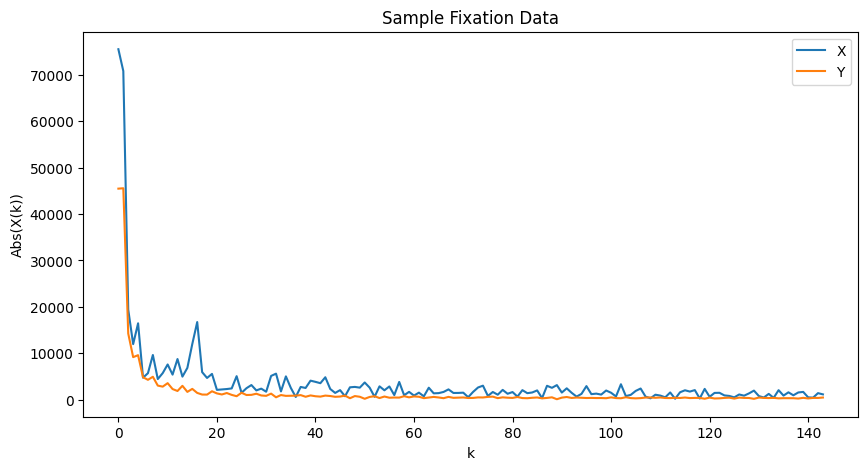

In [357]:
# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Enable verbose mode
verbose = True

# Load data
train_loader, test_loader, train_features, train_labels, test_features, test_labels = get_data(
    stim=stimulus, split_size=0.1, batch_size=32, random_state=42, addin_features=False
)

print(f"Length one channel features: {train_features.shape[1]}")

plt.figure(figsize=(10, 5))
plt.plot(train_features[0, :, 0], label='X')
plt.plot(train_features[0, :, 1], label='Y')
plt.xlabel('k')
plt.ylabel('Abs(X(k))')
plt.title('Sample Fixation Data')
plt.legend()
plt.show()


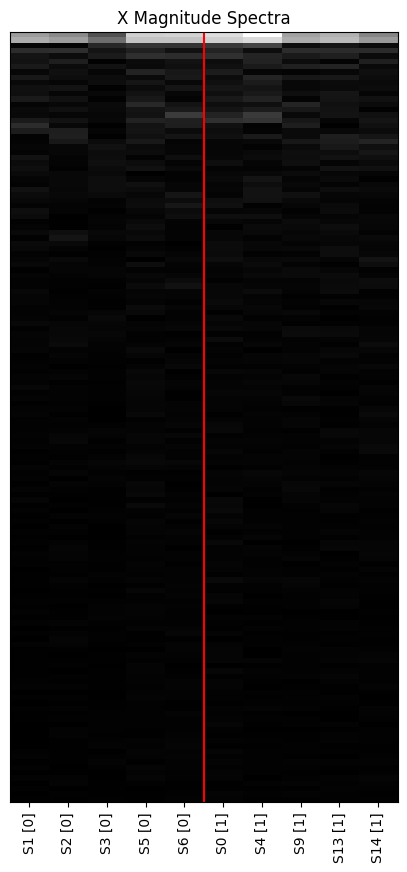

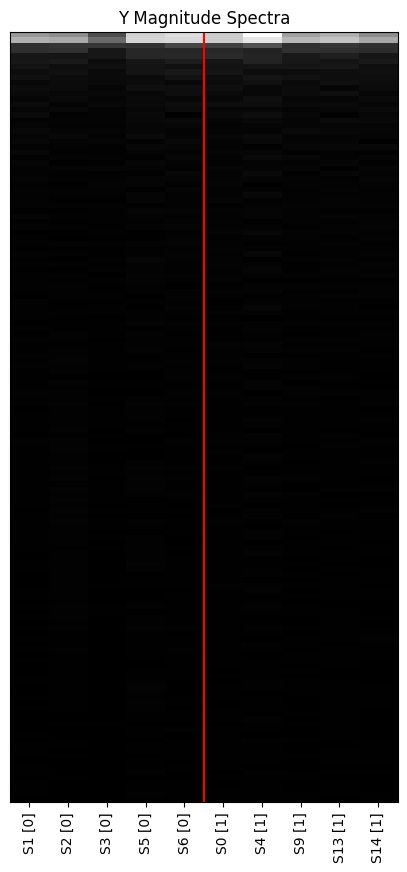

In [358]:
def plot_group_spectra(features, labels, title, channel):
    """
    Plots magnitude spectra for 5 subjects with label 0 vs. 5 subjects with label 1
    in a vertical grayscale heatmap.
    """
    # Select 5 subjects with label 0 and 5 subjects with label 1
    indices_0 = [i for i in range(len(labels)) if labels[i] == 0][:5]
    indices_1 = [i for i in range(len(labels)) if labels[i] == 1][:5]

    subjects_0 = torch.cat([features[i, :, channel].unsqueeze(1) for i in indices_0], dim=1)
    subjects_1 = torch.cat([features[i, :, channel].unsqueeze(1) for i in indices_1], dim=1)
    
    # Combine both groups into one visualization
    combined = torch.cat([subjects_0, subjects_1], dim=1)
    
    # Plot
    plt.figure(figsize=(5, 10))
    plt.imshow(combined.numpy(), cmap='gray', aspect='auto')
    
    # Add verticale line to separate groups
    plt.axvline(x=4.5, color='r')
    
    # Labels
    plt.yticks([])
    plt.xticks(range(10), [f'S{idx} [0]' for idx in indices_0] + [f'S{idx} [1]' for idx in indices_1], rotation=90)
    plt.title(title)
    plt.show()

# Plot for X and Y magnitudes
plot_group_spectra(train_features, train_labels, 'X Magnitude Spectra', channel=0)
plot_group_spectra(train_features, train_labels, 'Y Magnitude Spectra', channel=1)

In [359]:
class CNN(nn.Module):
    def __init__(self, num_classes, input_channels=2, input_length=248):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=4, kernel_size=2, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=2, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=2, stride=1, padding=1)

        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

        # Dummy input to compute the flattened size
        dummy_input = torch.zeros(1, input_channels, input_length)
        out = self._get_conv_output(dummy_input)
        self.fc = nn.Linear(out, num_classes)

    def _get_conv_output(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        return x.view(1, -1).size(1)

    def forward(self, x):
        x = x.transpose(1, 2)  # From [B, Seq, Ch] to [B, Ch, Seq]
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [360]:
# ---------------------
# Setup training
# ---------------------

def train_test(stimulus, batch_size=8):
    torch.manual_seed(42)
    np.random.seed(42)

    # Determine device to use (GPU if available)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    accuracy = []

    for i in range(5):
        # Load data
        train_loader, test_loader, train_features, train_labels, test_features, test_labels = get_data(
        stim=stimulus, split_size=0.1, batch_size=batch_size, random_state=i, addin_features=False
        )
        input_len = train_features.shape[1]
        # Determine number of classes from training labels.
        # Here we assume train_labels is a tensor containing integer class labels.
        num_classes = len(torch.unique(train_labels))
        model = CNN(num_classes=num_classes, input_channels=2, input_length=input_len).to(device)

        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        # ---------------------
        # Training loop
        # ---------------------
        num_epochs = 20  # Adjust as needed
        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0
            for features, labels in train_loader:
                # Move data to device
                features, labels = features.to(device), labels.to(device)
                labels = labels.squeeze().long()
                optimizer.zero_grad()
                outputs = model(features)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item() * features.size(0)
            
            epoch_loss = running_loss / len(train_loader.dataset)
            # print every 10 epochs
            if (epoch + 1) % 5 == 0:
                print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

        # ---------------------
        # Evaluation
        # ---------------------
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for features, labels in test_loader:
                # Move data to device
                features, labels = features.to(device), labels.to(device)
                labels = labels.squeeze()
                outputs = model(features)
                _, predicted = torch.max(outputs, 1)
                print(predicted, labels)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy.append(100 * correct / total)
        
    print(f"Average Test Accuracy: {np.mean(accuracy):.2f}%")
    print(f"Standard Deviation: {np.std(accuracy):.2f}")

In [361]:
stimulus = DyslexiaDat.stimuli[0]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)

Training and testing on stimulus: s7_stimuli_t1.jpg
Batch size: 8
Epoch 5/20, Loss: 22.8516
Epoch 10/20, Loss: 7.3957
Epoch 15/20, Loss: 0.8181
Epoch 20/20, Loss: 0.7976
tensor([1, 0, 0, 0, 0, 1, 1], device='cuda:0') tensor([0., 0., 0., 0., 0., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 4.5078
Epoch 10/20, Loss: 1.0447
Epoch 15/20, Loss: 5.3485
Epoch 20/20, Loss: 7.5604
tensor([0, 0, 0, 1, 0, 1, 1], device='cuda:0') tensor([0., 0., 1., 1., 1., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 24.1015
Epoch 10/20, Loss: 6.4622
Epoch 15/20, Loss: 3.2281
Epoch 20/20, Loss: 0.0000
tensor([1, 0, 1, 1, 0, 0, 1], device='cuda:0') tensor([1., 0., 0., 1., 1., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 13.3101
Epoch 10/20, Loss: 3.6103
Epoch 15/20, Loss: 3.6222
Epoch 20/20, Loss: 17.4789
tensor([1, 1, 1, 1, 1, 1, 1], device='cuda:0') tensor([1., 0., 1., 0., 0., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 4.9784
Epoch 10/20, Loss: 1.4719
Epoch 15/20, Loss: 0.0840
Epoch 20/20, Loss: 0.0005
tensor([0, 

In [362]:
stimulus = DyslexiaDat.stimuli[1]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)

Training and testing on stimulus: s7_stimuli_t4.jpg
Batch size: 8
Epoch 5/20, Loss: 8.6826
Epoch 10/20, Loss: 6.9443
Epoch 15/20, Loss: 3.6035
Epoch 20/20, Loss: 0.2198
tensor([1, 0, 0, 1, 0, 1, 1], device='cuda:0') tensor([0., 0., 0., 0., 0., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 3.2237
Epoch 10/20, Loss: 0.2181
Epoch 15/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000
tensor([0, 0, 0, 1, 0, 1, 1], device='cuda:0') tensor([0., 0., 1., 1., 1., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 1.0651
Epoch 10/20, Loss: 0.0000
Epoch 15/20, Loss: 0.0001
Epoch 20/20, Loss: 0.0000
tensor([0, 0, 1, 1, 1, 0, 1], device='cuda:0') tensor([1., 0., 0., 1., 1., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 5.4326
Epoch 10/20, Loss: 0.0616
Epoch 15/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000
tensor([1, 0, 1, 0, 0, 1, 1], device='cuda:0') tensor([1., 0., 1., 0., 0., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 9.6018
Epoch 10/20, Loss: 0.1370
Epoch 15/20, Loss: 0.0001
Epoch 20/20, Loss: 0.0001
tensor([0, 0, 0

In [363]:
stimulus = DyslexiaDat.stimuli[2]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)

Training and testing on stimulus: s7_stimuli_t5.jpg
Batch size: 8
Epoch 5/20, Loss: 28.6650
Epoch 10/20, Loss: 2.9275
Epoch 15/20, Loss: 12.8023
Epoch 20/20, Loss: 0.6222
tensor([1, 0, 1, 1, 1, 1, 1], device='cuda:0') tensor([0., 0., 0., 0., 0., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 5.4600
Epoch 10/20, Loss: 11.1686
Epoch 15/20, Loss: 3.7975
Epoch 20/20, Loss: 0.0000
tensor([0, 1, 0, 1, 0, 1, 1], device='cuda:0') tensor([0., 0., 1., 1., 1., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 2.5411
Epoch 10/20, Loss: 0.0298
Epoch 15/20, Loss: 0.0002
Epoch 20/20, Loss: 0.0000
tensor([0, 0, 1, 1, 0, 0, 1], device='cuda:0') tensor([1., 0., 0., 1., 1., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 0.1618
Epoch 10/20, Loss: 0.0360
Epoch 15/20, Loss: 0.0106
Epoch 20/20, Loss: 0.0048
tensor([0, 0, 0, 1, 1, 1, 0], device='cuda:0') tensor([1., 0., 1., 0., 0., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 0.6527
Epoch 10/20, Loss: 0.5318
Epoch 15/20, Loss: 0.3957
Epoch 20/20, Loss: 0.2062
tensor([0, 1

In [366]:
class CNN(nn.Module):
    def __init__(self, num_classes, input_channels=2, input_length=248):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

        # Dummy input to compute the flattened size
        dummy_input = torch.zeros(1, input_channels, input_length)
        out = self._get_conv_output(dummy_input)
        self.fc = nn.Linear(out, num_classes)

    def _get_conv_output(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        return x.view(1, -1).size(1)

    def forward(self, x):
        x = x.transpose(1, 2)  # From [B, Seq, Ch] to [B, Ch, Seq]
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [367]:
stimulus = DyslexiaDat.stimuli[0]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)

Training and testing on stimulus: s7_stimuli_t1.jpg
Batch size: 8
Epoch 5/20, Loss: 8.0785
Epoch 10/20, Loss: 0.5674
Epoch 15/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0001
tensor([1, 0, 1, 0, 0, 1, 1], device='cuda:0') tensor([0., 0., 0., 0., 0., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 3.0437
Epoch 10/20, Loss: 1.5098
Epoch 15/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000
tensor([0, 0, 0, 1, 0, 0, 1], device='cuda:0') tensor([0., 0., 1., 1., 1., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 3.9611
Epoch 10/20, Loss: 1.2636
Epoch 15/20, Loss: 1.3793
Epoch 20/20, Loss: 0.6217
tensor([0, 0, 1, 1, 0, 0, 1], device='cuda:0') tensor([1., 0., 0., 1., 1., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 4.0401
Epoch 10/20, Loss: 2.2152
Epoch 15/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000
tensor([1, 0, 1, 0, 1, 1, 0], device='cuda:0') tensor([1., 0., 1., 0., 0., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 53.5328
Epoch 10/20, Loss: 6.5373
Epoch 15/20, Loss: 0.6493
Epoch 20/20, Loss: 0.6869
tensor([0, 0, 

In [368]:
stimulus = DyslexiaDat.stimuli[1]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)

Training and testing on stimulus: s7_stimuli_t4.jpg
Batch size: 8
Epoch 5/20, Loss: 5.5302
Epoch 10/20, Loss: 0.0044
Epoch 15/20, Loss: 0.0001
Epoch 20/20, Loss: 0.0000
tensor([0, 0, 0, 0, 0, 1, 1], device='cuda:0') tensor([0., 0., 0., 0., 0., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 15.7731
Epoch 10/20, Loss: 0.0004
Epoch 15/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000
tensor([0, 0, 0, 1, 0, 1, 1], device='cuda:0') tensor([0., 0., 1., 1., 1., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 2.5017
Epoch 10/20, Loss: 0.5991
Epoch 15/20, Loss: 1.3345
Epoch 20/20, Loss: 0.0000
tensor([1, 1, 1, 1, 1, 0, 1], device='cuda:0') tensor([1., 0., 0., 1., 1., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 0.5197
Epoch 10/20, Loss: 0.0025
Epoch 15/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000
tensor([1, 0, 1, 0, 0, 1, 1], device='cuda:0') tensor([1., 0., 1., 0., 0., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 3.5847
Epoch 10/20, Loss: 0.5857
Epoch 15/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000
tensor([1, 0, 

In [369]:
stimulus = DyslexiaDat.stimuli[2]
print(f"Training and testing on stimulus: {stimulus}")
print(f"Batch size: 8")
train_test(stimulus, batch_size=8)
print(f"Batch size: 16")
train_test(stimulus, batch_size=16)
print(f"Batch size: 32")
train_test(stimulus, batch_size=32)

Training and testing on stimulus: s7_stimuli_t5.jpg
Batch size: 8
Epoch 5/20, Loss: 13.3550
Epoch 10/20, Loss: 0.0855
Epoch 15/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000
tensor([0, 0, 1, 0, 0, 1, 1], device='cuda:0') tensor([0., 0., 0., 0., 0., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 6.3520
Epoch 10/20, Loss: 0.0071
Epoch 15/20, Loss: 0.0001
Epoch 20/20, Loss: 0.0000
tensor([1, 1, 1, 1, 0, 1, 1], device='cuda:0') tensor([0., 0., 1., 1., 1., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 18.6541
Epoch 10/20, Loss: 0.8617
Epoch 15/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000
tensor([0, 0, 0, 1, 0, 0, 1], device='cuda:0') tensor([1., 0., 0., 1., 1., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 7.0283
Epoch 10/20, Loss: 0.0000
Epoch 15/20, Loss: 0.0000
Epoch 20/20, Loss: 0.0000
tensor([1, 0, 1, 0, 1, 1, 0], device='cuda:0') tensor([1., 0., 1., 0., 0., 1., 1.], device='cuda:0')
Epoch 5/20, Loss: 3.3296
Epoch 10/20, Loss: 0.0216
Epoch 15/20, Loss: 0.0271
Epoch 20/20, Loss: 0.0000
tensor([0, 0,